# Importing Library

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter,DayLocator
import matplotlib.dates as mdates
import matplotlib.style
import seaborn as sns
sns.set(style="white")
matplotlib.style.use('ggplot')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/covid19/train_data.csv


# Loading Dataset

In [2]:
df = pd.read_csv('../input/covid19/train_data.csv')
df.head()

,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities
0,1,NaN,Afghanistan,2020-01-22,0.0,0.0
1,2,NaN,Afghanistan,2020-01-23,0.0,0.0
2,3,NaN,Afghanistan,2020-01-24,0.0,0.0
3,4,NaN,Afghanistan,2020-01-25,0.0,0.0
4,5,NaN,Afghanistan,2020-01-26,0.0,0.0


In [3]:
print('Data information')
print(df.info(), end='\n\n')
print('Checking for null values')
print(df.isnull().sum(), end='\n\n')
print('Necessary information from the dataset')
print('Total affected countries ', len(df['Country_Region'].unique()))
print('Total confirmed cases ', df['ConfirmedCases'].sum())
print('Total fatalities cases ', df['Fatalities'].sum())


Data information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25353 entries, 0 to 25352
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              25353 non-null  int64  
 1   Province_State  10773 non-null  object 
 2   Country_Region  25353 non-null  object 
 3   Date            25353 non-null  object 
 4   ConfirmedCases  25353 non-null  float64
 5   Fatalities      25353 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 1.2+ MB
None

Checking for null values
Id                    0
Province_State    14580
Country_Region        0
Date                  0
ConfirmedCases        0
Fatalities            0
dtype: int64

Necessary information from the dataset
Total affected countries  184
Total confirmed cases  25449963.0
Total fatalities cases  1277610.0


# Global Confirmed Cases from 2020/01/22 to 2020/04/11

In [4]:
d = df['Date'].unique()
date = {}
for i in d:
    date.update({i:0})
    
for i in date:
    date.update({i:df[df['Date']==i]['ConfirmedCases'].sum()})

In [5]:
x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in date.keys()]
y_values = date.values()

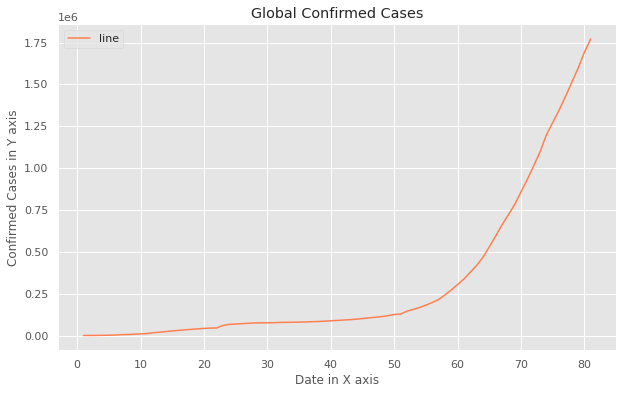

In [6]:
plt.figure(figsize=(10,6))
x_values = [i for i in range(1,82)]
y_values = [i for i in y_values]
ax = sns.lineplot(x=x_values, y=y_values, color='coral', label="line")
ax.set_title('Global Confirmed Cases')
ax.set(xlabel="Date in X axis", ylabel = "Confirmed Cases in Y axis")
plt.show()

# Global Fatalities Cases from 2020/01/22 to 2020/04/11

In [7]:
d = df['Date'].unique()
date = {}
for i in d:
    date.update({i:0})
    
for i in date:
    date.update({i:df[df['Date']==i]['Fatalities'].sum()})

In [8]:
x_values = [datetime.datetime.strptime(d,"%Y-%m-%d").date() for d in date.keys()]
y_values = date.values()

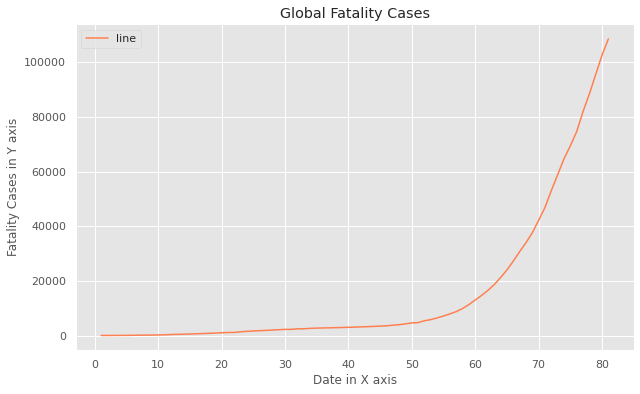

In [9]:
plt.figure(figsize=(10,6))
x_values = [i for i in range(1,82)]
y_values = [i for i in y_values]
ax = sns.lineplot(x=x_values, y=y_values, color='coral', label="line")
ax.set_title('Global Fatality Cases')
ax.set(xlabel="Date in X axis", ylabel = "Fatality Cases in Y axis")
plt.show()

# Countrywise Analysis

In [10]:
data = {'Country':[], 'ConfirmedCases':[], 'Fatalities':[]}
data.update({'Country':df['Country_Region'].unique()})

confirm_case = []
for i in data['Country']:
    confirm_case.append(df[df['Country_Region'] == i]['ConfirmedCases'].sum())

fatalities_case = []
for i in data['Country']:
    fatalities_case.append(df[df['Country_Region'] == i]['Fatalities'].sum())
    
data.update({'ConfirmedCases':confirm_case})
data.update({'Fatalities':fatalities_case})

In [11]:
print(len(data['Country']))
print(len(data['ConfirmedCases']))
print(len(data['Fatalities']))

184
184
184


In [12]:
data = pd.DataFrame(data)
data.head()

,Country,ConfirmedCases,Fatalities
0,Afghanistan,5458.0,146.0
1,Albania,6184.0,313.0
2,Algeria,20118.0,2192.0
3,Andorra,8430.0,262.0
4,Angola,205.0,28.0


In [13]:
df_confirm_asc = data.sort_values(by=['ConfirmedCases'], ascending=False)

In [14]:
df_confirm_asc = df_confirm_asc.reset_index(drop=True)
df_confirm_asc.style.background_gradient(cmap="Reds")

,Country,ConfirmedCases,Fatalities
0,US,5135445.000000,147545.000000
1,China,5096274.000000,182450.000000
2,Italy,2661341.000000,297444.000000
3,Spain,2237252.000000,200412.000000
4,Germany,1728391.000000,24491.000000
5,France,1476739.000000,122427.000000
6,Iran,1184893.000000,75219.000000
7,United Kingdom,749434.000000,72805.000000
8,Turkey,408544.000000,8310.000000
9,Switzerland,393842.000000,11029.000000


In [15]:
x_values = [i for i in df_confirm_asc.loc[0:9,'Country']]
y_values = [i for i in df_confirm_asc.loc[0:9,'ConfirmedCases']]

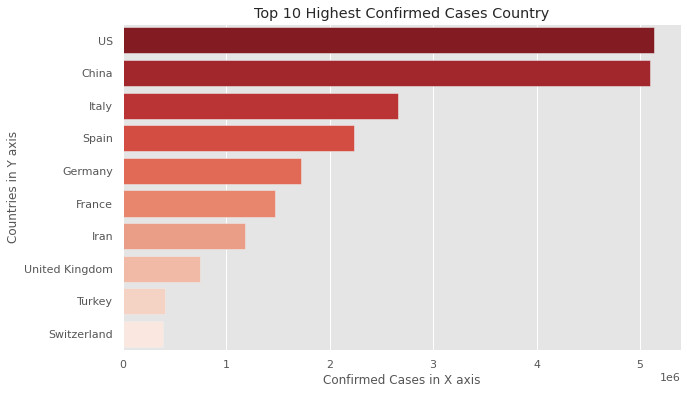

In [16]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=y_values, y=x_values, palette='Reds_r')
ax.set_title('Top 10 Highest Confirmed Cases Country')
ax.set(xlabel="Confirmed Cases in X axis", ylabel = "Countries in Y axis")
plt.show()

In [17]:
df_fatality_asc = data.sort_values(by=['Fatalities'], ascending=False)
df_fatality_asc = df_fatality_asc.reset_index(drop=True)
df_fatality_asc.style.background_gradient(cmap="Reds")

,Country,ConfirmedCases,Fatalities
0,Italy,2661341.000000,297444.000000
1,Spain,2237252.000000,200412.000000
2,China,5096274.000000,182450.000000
3,US,5135445.000000,147545.000000
4,France,1476739.000000,122427.000000
5,Iran,1184893.000000,75219.000000
6,United Kingdom,749434.000000,72805.000000
7,Netherlands,310043.000000,27083.000000
8,Germany,1728391.000000,24491.000000
9,Belgium,319318.000000,23652.000000


In [18]:
x_values = [i for i in df_fatality_asc.loc[0:9,'Country']]
y_values = [i for i in df_fatality_asc.loc[0:9,'Fatalities']]

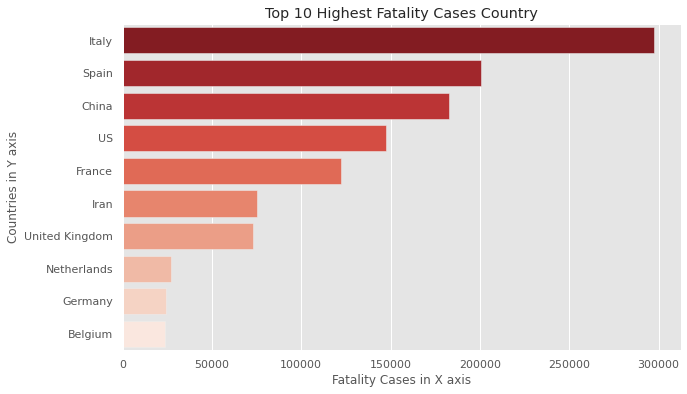

In [19]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=y_values, y=x_values, palette='Reds_r')
ax.set_title('Top 10 Highest Fatality Cases Country')
ax.set(xlabel="Fatality Cases in X axis", ylabel = "Countries in Y axis")
plt.show()

In [20]:
df_confirm_asc = data.sort_values(by=['ConfirmedCases'], ascending=True)
df_confirm_asc = df_confirm_asc.reset_index(drop=True)
df_confirm_asc.style.background_gradient(cmap="Reds")

,Country,ConfirmedCases,Fatalities
0,South Sudan,17.000000,0.000000
1,Timor-Leste,23.000000,0.000000
2,Sao Tome and Principe,24.000000,0.000000
3,Western Sahara,28.000000,0.000000
4,Papua New Guinea,29.000000,0.000000
5,Burundi,36.000000,0.000000
6,Sierra Leone,59.000000,0.000000
7,Malawi,64.000000,6.000000
8,Gambia,84.000000,20.000000
9,Botswana,86.000000,12.000000


In [21]:
x_values = [i for i in df_confirm_asc.loc[0:9,'Country']]
y_values = [i for i in df_confirm_asc.loc[0:9,'ConfirmedCases']]

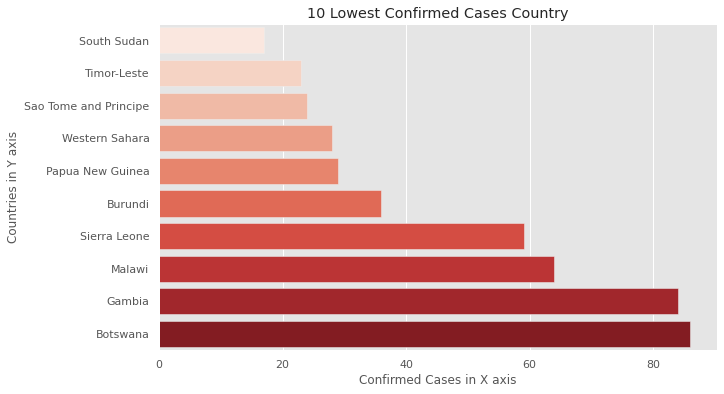

In [22]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=y_values, y=x_values, palette='Reds')
ax.set_title('10 Lowest Confirmed Cases Country')
ax.set(xlabel="Confirmed Cases in X axis", ylabel = "Countries in Y axis")
plt.show()

In [23]:
df_fatality_asc = data.sort_values(by=['Fatalities'], ascending=True)
df_fatality_asc = df_fatality_asc.reset_index(drop=True)
df_fatality_asc.style.background_gradient(cmap="Reds")

,Country,ConfirmedCases,Fatalities
0,Saint Kitts and Nevis,137.000000,0.000000
1,Equatorial Guinea,312.000000,0.000000
2,Madagascar,1150.000000,0.000000
3,Sao Tome and Principe,24.000000,0.000000
4,Saint Vincent and the Grenadines,97.000000,0.000000
5,Burundi,36.000000,0.000000
6,Maldives,498.000000,0.000000
7,Cambodia,2524.000000,0.000000
8,Saint Lucia,219.000000,0.000000
9,Laos,192.000000,0.000000


In [24]:
x_values = [i for i in df_fatality_asc.loc[34:43,'Country']]
y_values = [i for i in df_fatality_asc.loc[34:43,'Fatalities']]

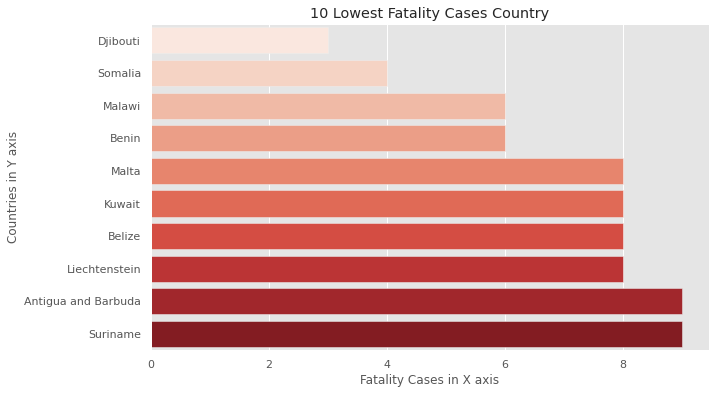

In [25]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=y_values, y=x_values, palette='Reds')
ax.set_title('10 Lowest Fatality Cases Country')
ax.set(xlabel="Fatality Cases in X axis", ylabel = "Countries in Y axis")
plt.show()

In [26]:
df_confirm_asc = data.sort_values(by=['ConfirmedCases'], ascending=False)
df_confirm_asc = df_confirm_asc.reset_index(drop=True)
x_values = [i for i in df_confirm_asc.loc[0:9,'Country']]
y_values = [i for i in df_confirm_asc.loc[0:9,'ConfirmedCases']]

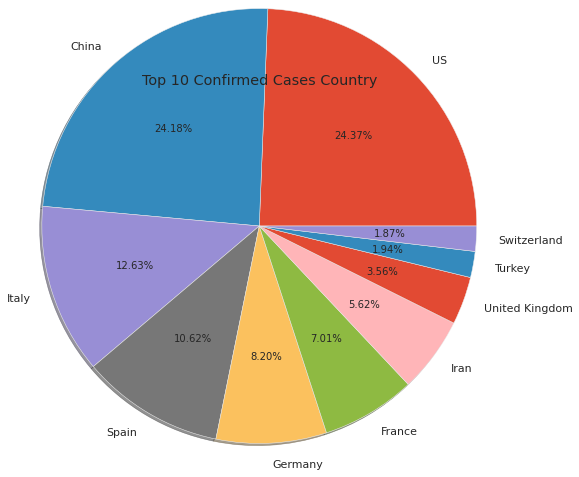

In [27]:

plt.figure(figsize=(5,5))
plt.axis('equal')
plt.pie(y_values, labels=x_values, radius=2, autopct='%.2f%%', shadow=True, startangle=0)
plt.title('Top 10 Confirmed Cases Country')
plt.show()

In [28]:
df_fatality_asc = data.sort_values(by=['Fatalities'], ascending=False)
df_fatality_asc = df_fatality_asc.reset_index(drop=True)
x_values = [i for i in df_fatality_asc.loc[0:9,'Country']]
y_values = [i for i in df_fatality_asc.loc[0:9,'Fatalities']]

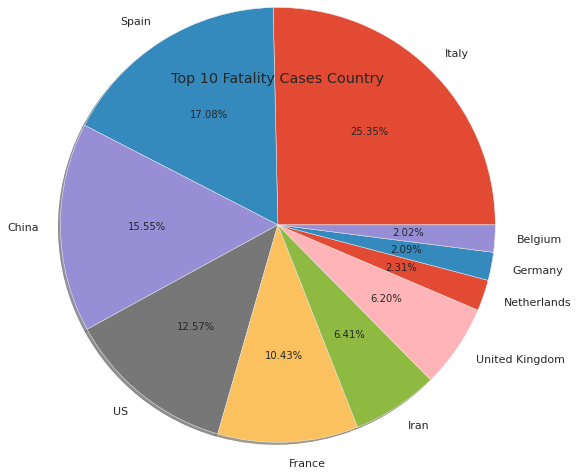

In [29]:

plt.figure(figsize=(5,5))
plt.axis('equal')
plt.pie(y_values, labels=x_values, radius=2, autopct='%.2f%%', shadow=True, startangle=0)
plt.title('Top 10 Fatality Cases Country')
plt.show()

In [30]:
data = {'Date':[], 'US':[], 'China':[], 'Italy':[], 'Spain':[], 'Germany':[], 'France':[], 'Iran':[]}
data.update({'Date': df['Date'].unique()})

for i in data['Date']:
    data['US'].append(df[(df['Date']==i) & (df['Country_Region']=='US')]['ConfirmedCases'].sum())
    data['China'].append(df[(df['Date']==i) & (df['Country_Region']=='China')]['ConfirmedCases'].sum())
    data['Italy'].append(df[(df['Date']==i) & (df['Country_Region']=='Italy')]['ConfirmedCases'].sum())
    data['Spain'].append(df[(df['Date']==i) & (df['Country_Region']=='Spain')]['ConfirmedCases'].sum())
    data['Germany'].append(df[(df['Date']==i) & (df['Country_Region']=='Germany')]['ConfirmedCases'].sum())
    data['France'].append(df[(df['Date']==i) & (df['Country_Region']=='France')]['ConfirmedCases'].sum())
    data['Iran'].append(df[(df['Date']==i) & (df['Country_Region']=='Iran')]['ConfirmedCases'].sum())
    
data = pd.DataFrame(data)
data.head()  

,Date,US,China,Italy,Spain,Germany,France,Iran
0,2020-01-22,0.0,548.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,643.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,920.0,0.0,0.0,0.0,2.0,0.0
3,2020-01-25,0.0,1406.0,0.0,0.0,0.0,3.0,0.0
4,2020-01-26,0.0,2075.0,0.0,0.0,0.0,3.0,0.0


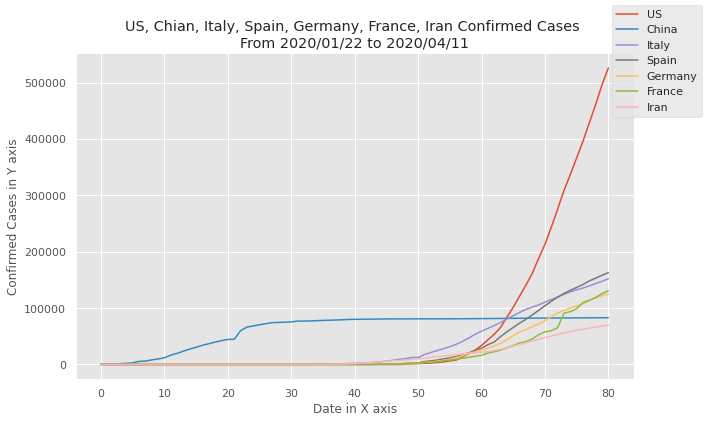

In [31]:
ax = plt.figure(figsize=(10,6))
a = sns.lineplot(x=data.index, y=data.US, data = data)
a = sns.lineplot(x=data.index, y=data.China, data = data )
a = sns.lineplot(x=data.index, y=data.Italy, data = data )
a = sns.lineplot(x=data.index, y=data.Spain, data = data )
a = sns.lineplot(x=data.index, y=data.Germany, data = data )
a = sns.lineplot(x=data.index, y=data.France, data = data )
a = sns.lineplot(x=data.index, y=data['Iran'], data = data )
ax.legend(['US', 'China', 'Italy', 'Spain', 'Germany', 'France', 'Iran'], loc='upper right')
a.set_title('US, Chian, Italy, Spain, Germany, France, Iran Confirmed Cases \nFrom 2020/01/22 to 2020/04/11')
a.set(xlabel="Date in X axis", ylabel = "Confirmed Cases in Y axis")
plt.show()

In [32]:
data = {'Date':[], 'US':[], 'China':[], 'Italy':[], 'Spain':[], 'Germany':[], 'France':[], 'Iran':[]}
data.update({'Date': df['Date'].unique()})

for i in data['Date']:
    data['US'].append(df[(df['Date']==i) & (df['Country_Region']=='US')]['Fatalities'].sum())
    data['China'].append(df[(df['Date']==i) & (df['Country_Region']=='China')]['Fatalities'].sum())
    data['Italy'].append(df[(df['Date']==i) & (df['Country_Region']=='Italy')]['Fatalities'].sum())
    data['Spain'].append(df[(df['Date']==i) & (df['Country_Region']=='Spain')]['Fatalities'].sum())
    data['Germany'].append(df[(df['Date']==i) & (df['Country_Region']=='Germany')]['Fatalities'].sum())
    data['France'].append(df[(df['Date']==i) & (df['Country_Region']=='France')]['Fatalities'].sum())
    data['Iran'].append(df[(df['Date']==i) & (df['Country_Region']=='Iran')]['Fatalities'].sum())
    
data = pd.DataFrame(data)
data.head()  

,Date,US,China,Italy,Spain,Germany,France,Iran
0,2020-01-22,0.0,17.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,18.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,26.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,42.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,56.0,0.0,0.0,0.0,0.0,0.0


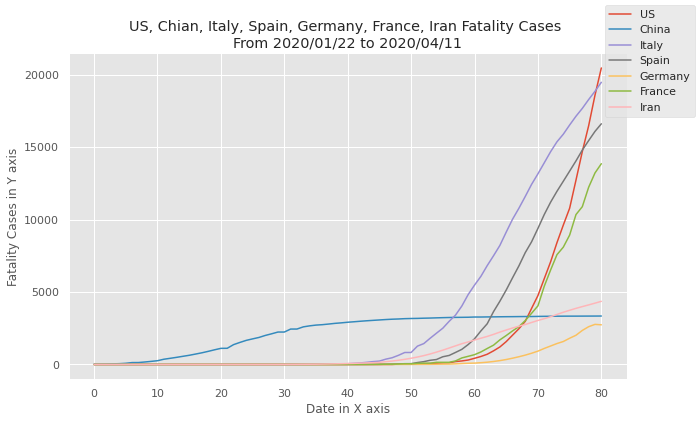

In [33]:
ax = plt.figure(figsize=(10,6))
a = sns.lineplot(x=data.index, y=data.US, data = data)
a = sns.lineplot(x=data.index, y=data.China, data = data )
a = sns.lineplot(x=data.index, y=data.Italy, data = data )
a = sns.lineplot(x=data.index, y=data.Spain, data = data )
a = sns.lineplot(x=data.index, y=data.Germany, data = data )
a = sns.lineplot(x=data.index, y=data.France, data = data )
a = sns.lineplot(x=data.index, y=data['Iran'], data = data )
ax.legend(['US', 'China', 'Italy', 'Spain', 'Germany', 'France', 'Iran'], loc='upper right')
a.set_title('US, Chian, Italy, Spain, Germany, France, Iran Fatality Cases \nFrom 2020/01/22 to 2020/04/11')
a.set(xlabel="Date in X axis", ylabel = "Fatality Cases in Y axis")
plt.show()